<a href="https://colab.research.google.com/github/JManuelRG/cursopython/blob/main/2/Uso%20de%20librer%C3%ADas/Flujo_Isentr%C3%B3pico%20Tobera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

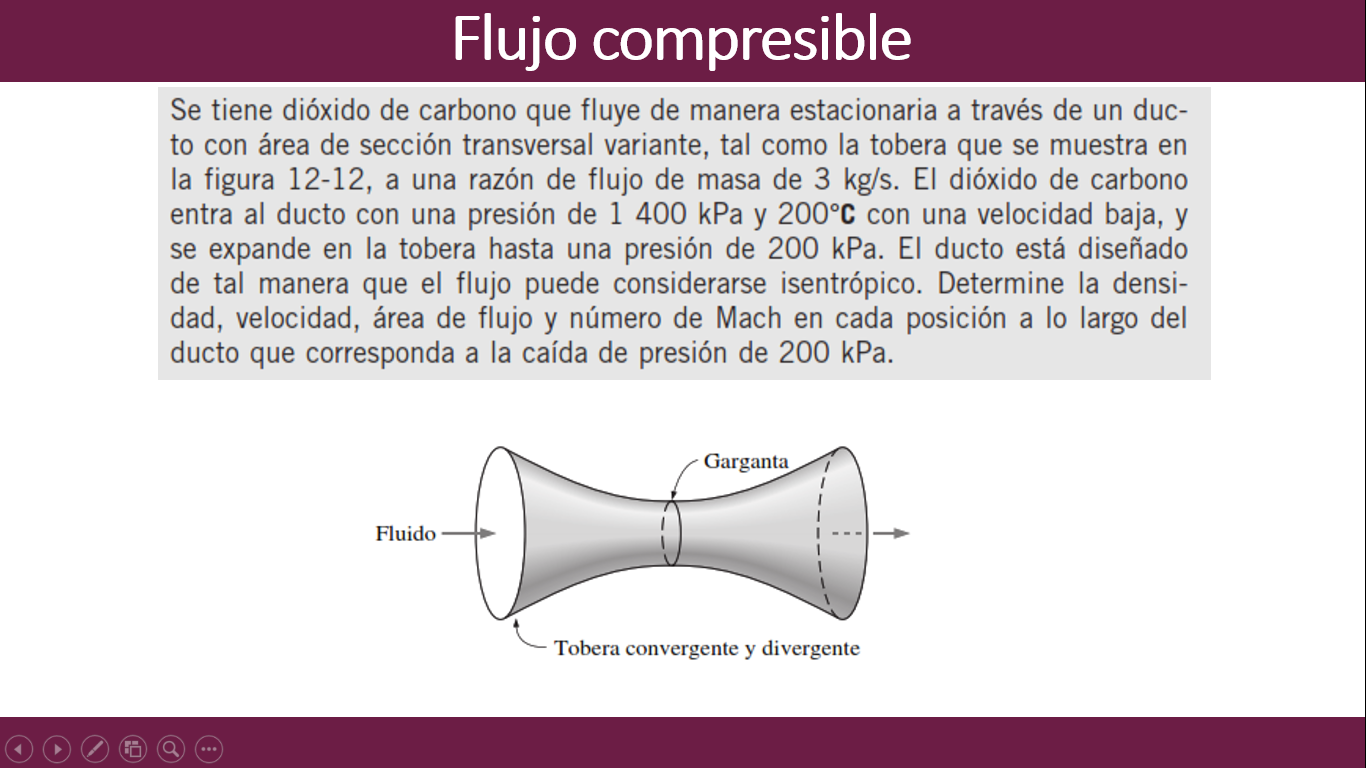

# Cálculos de las Propiedades del Flujo en cada punto en función de a caída de presión

In [63]:
import numpy as np # Librería de Cálculos Numéricos, Vectores
import pandas as pd # Librería de Bases de Datos y Tablas
import matplotlib.pyplot as plt # Librería de Graficación

In [79]:
# Inicializar vector de valores de presión
P=np.arange(start=1400,stop=0,step=-200)
P

array([1400, 1200, 1000,  800,  600,  400,  200])

In [65]:
# Datos físicos
k=1.289
cp=0.846 #kJ/kgK
R=0.1889 #kJ/kgK
m=3 #kg/s Flujo másico de CO2

# Solución
## - Se considera flujo isentrópico, y por lo tanto, adiabático.
## - La presión y temperatura de estancamiento son constantes a lo largo del sistema.
## - A la entrada, la temperatura y presión son iguales a las de estancamiento:

$$T_o=T_1+\frac{V^2}{2C_P}$$
$$v_1\approx 0$$
$$T_o \approx T_1$$

$$$$

$$\frac{P_o}{P}=\frac{T_o}{T}^{({\frac{k}{k-1}})}$$

$$\frac{P_o}{P}^{({\frac{k-1}{k}})}=\frac{T_o}{T}$$

$$\frac{P_o}{P}=1$$
$$P=P_o$$

In [66]:
#Presión y temperatura de estancamiento
To=T1=200+273.15 #K
Po=P1=1400 #kpa

# Propiedades en los diferentes puntos de la tobera:

## 1. Temperatura:
$$\frac{P_1}{P_i}^{({\frac{k-1}{k}})}=\frac{T_1}{T_i}$$

$$T_i=T_1{\frac{P_1}{P_i}^{({\frac{k-1}{k}})}}$$

In [67]:
# Temperatura en K
T = To/(Po/P)**((k-1)/(k))
T

array([473.15      , 457.07666735, 438.76930293, 417.35781006,
       391.28813518, 357.28614228, 305.86078512])

# 2. Velocidad:
$$T_o=T_i+\frac{v^2}{2C_P}$$
$$v=\sqrt{2C_P(To-T_i)}$$

In [68]:
# Velocidad en m/s
v=np.sqrt(2*cp*(To-T)*1000)
v

array([  0.        , 164.91233683, 241.18901186, 307.24645705,
       372.16968613, 442.76590572, 532.02758535])

# 3. Velocidad del sonido en el gas y número de Mach

$$c_i=\sqrt{(kR_{esp}T)}$$
$$Ma=\frac{v_i}{c_i}$$

In [69]:
# velocidad del sonido
c=np.sqrt(k*R*T*1000)
c

array([339.42346282, 333.60838957, 326.85908124, 318.78414268,
       308.66740959, 294.95144191, 272.90050362])

In [70]:
# Mach
Ma=v/c
Ma

array([0.        , 0.49432911, 0.73789907, 0.96380722, 1.20573042,
       1.50114847, 1.94952951])

# 4. Densidad del gas (ideal)
$$\rho=\frac{P_i}{R_{esp}T_i}$$

In [71]:
ro = P/(R*T) # en kg/m3
ro

array([15.66380375, 13.89825373, 12.06512445, 10.14727626,  8.11750591,
        5.92668522,  3.46157893])

# 5. Área y diámetro del ducto
$$\dot{m}=A_i \rho_i v_i$$
$$A_i=\frac{\dot{m}}{\rho v_i}$$

$$$$
$$A=\frac{\pi d^2}{4}$$
$$d=\sqrt{\frac{4A}{\pi}}$$

In [72]:
A = (m/(ro*v))*1e4 #Área en cm^2
A

<ipython-input-72-90e4e8383ce9>:1: RuntimeWarning: divide by zero encountered in true_divide
  A = (m/(ro*v))*1e4 #Área en cm^2


array([        inf, 13.08904235, 10.30936534,  9.6224328 ,  9.93019199,
       11.43234236, 16.28969171])

In [73]:
d=np.sqrt(4*A/np.pi) # diámetro en cm
d

array([       inf, 4.08233834, 3.62302244, 3.50023742, 3.55577181,
       3.81524709, 4.55419363])

# Tabla de resultados

In [74]:
dic = {"P(kPa)":P,
          "T(K)":T,
          "v(m/s)":v,
          "ro (kg/m^3)":ro,
          "c (m/s)":c,
          "Ma":Ma,
          "A (m^2)":A,
          "d (cm^2)":d}

In [75]:
resultados1=pd.DataFrame(dic)
resultados1

,P(kPa),T(K),v(m/s),ro (kg/m^3),c (m/s),Ma,A (m^2),d (cm^2)
0,1400,473.150000,0.000000,15.663804,339.423463,0.000000,inf,inf
1,1200,457.076667,164.912337,13.898254,333.608390,0.494329,13.089042,4.082338
2,1000,438.769303,241.189012,12.065124,326.859081,0.737899,10.309365,3.623022
3,800,417.357810,307.246457,10.147276,318.784143,0.963807,9.622433,3.500237
4,600,391.288135,372.169686,8.117506,308.667410,1.205730,9.930192,3.555772
5,400,357.286142,442.765906,5.926685,294.951442,1.501148,11.432342,3.815247
6,200,305.860785,532.027585,3.461579,272.900504,1.949530,16.289692,4.554194
